<a href="https://colab.research.google.com/github/ssenichhh/Neural-Networks/blob/main/SVHN/SVHN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVHN (Street View House Numbers) Dataset Exploration and Modeling

This script demonstrates the process of loading, preprocessing, modeling, and evaluating the SVHN dataset using a pre-trained ResNet50 model. The steps include:
1. Loading and exploring the SVHN dataset.
2. Preprocessing the images and labels.
3. Building a transfer learning model using ResNet50.
4. Training the model and evaluating its performance.
5. Visualizing training progress and results.


# Realization

94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
287/287 [==============================] - 247s 851ms/step - loss: 2.3941 - accuracy: 0.1713 - val_loss: 2.2094 - val_accuracy: 0.1974
Epoch 2/10
287/287 [==============================] - 218s 762ms/step - loss: 2.2284 - accuracy: 0.1995 - val_loss: 2.1991 - val_accuracy: 0.2001
Epoch 3/10
287/287 [==============================] - 217s 756ms/step - loss: 2.2157 - accuracy: 0.2072 - val_loss: 2.1842 - val_accuracy: 0.2202
Epoch 4/10
287/287 [==============================] - 243s 846ms/step - loss: 2.2019 - accuracy: 0.2170 - val_loss: 2.1719 - val_accuracy: 0.2314
Epoch 5/10
287/287 [==============================] - 217s 758ms/step - loss: 2.1875 - accuracy: 0.2225 - val_loss: 2.1590 - val_accuracy: 0.2257
Epoch 6/10
287/287 [==============================] - 217s 757ms/step - loss: 2.1754 - accuracy: 0.2271 - val_loss: 2.1461 - val_accuracy: 0.2460
Epoch 7/10
287/287 [==============================] - 217s 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model accuracy on the test dataset: 27.58%
Model Precision on the test dataset: 22.61%
Model Recall on the test dataset: 27.58%
Model F1-score on the test dataset: 18.09%


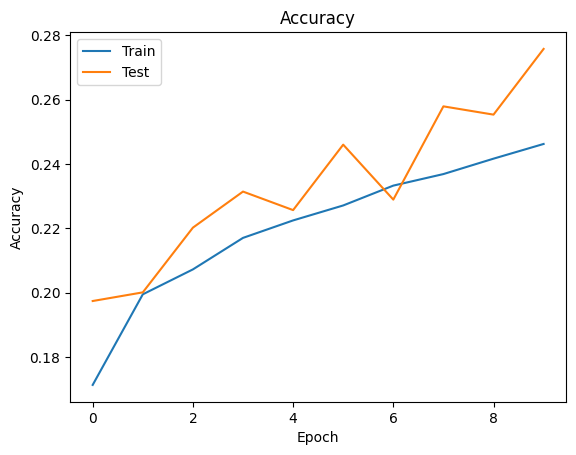

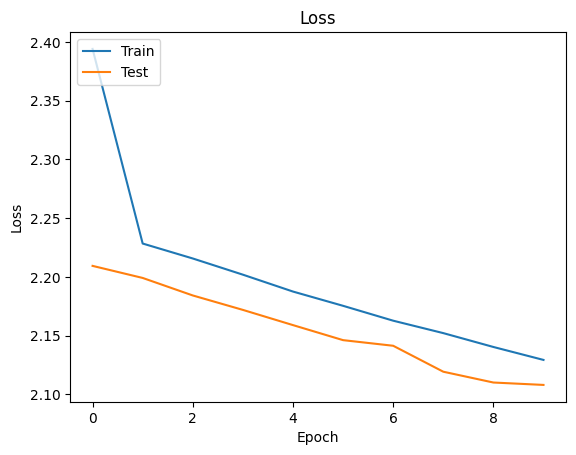

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelBinarizer

def load_svhn():
    """
    Load the SVHN dataset from .mat files.

    Returns:
        x_train (numpy.ndarray): Training images.
        y_train (numpy.ndarray): Training labels.
        x_test (numpy.ndarray): Test images.
        y_test (numpy.ndarray): Test labels.
    """
    train_data = loadmat('/content/train_32x32.mat')
    test_data = loadmat('/content/test_32x32.mat')

    x_train, y_train = train_data['X'], train_data['y']
    x_test, y_test = test_data['X'], test_data['y']

    # Move the channel dimension to the last axis
    x_train = np.moveaxis(x_train, -1, 0)
    x_test = np.moveaxis(x_test, -1, 0)

    y_train = np.squeeze(y_train)
    y_test = np.squeeze(y_test)

    return x_train, y_train, x_test, y_test

# Load the SVHN dataset
x_train, y_train, x_test, y_test = load_svhn()

# Normalize the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

# Freeze the base model layers
base_model.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print evaluation metrics
print(f"Model accuracy on the test dataset: {accuracy * 100:.2f}%")
print(f"Model Precision on the test dataset: {precision * 100:.2f}%")
print(f"Model Recall on the test dataset: {recall * 100:.2f}%")
print(f"Model F1-score on the test dataset: {f1 * 100:.2f}%")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()